### CSAI 801 Project: COVID-19 Outcome Prediction
` this dataset to measure `
#### columns 
1. Country: where the person resides
2. Location: which part in the Country
3. Age: Classification of the age group for each person, based on WHO Age Group Standard
4. Gender: Male or Female
5. Visited_Wuhan: whether the person has visited Wuhan, China or not
6. From_Wuhan: whether the person is from Wuhan, China or not
7. Symptoms: there are six families of symptoms that are coded in six fields.
13. Time_before_symptoms_appear:
14. Result: death (1) or recovered (0)

In [150]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from six import StringIO
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import preprocessing, base, metrics
from sklearn.metrics import precision_score, recall_score,roc_auc_score, accuracy_score, f1_score, precision_recall_curve, roc_curve, classification_report
from sklearn.feature_selection import SelectKBest, chi2
import warnings
warnings.filterwarnings("ignore")

### Data Exploratory Analysis

In [151]:
df = pd.read_csv("data.csv")
data = df.copy()
df = df.iloc[:,1:]

`read data `

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   location      863 non-null    int64  
 1   country       863 non-null    int64  
 2   gender        863 non-null    int64  
 3   age           863 non-null    float64
 4   vis_wuhan     863 non-null    int64  
 5   from_wuhan    863 non-null    int64  
 6   symptom1      863 non-null    int64  
 7   symptom2      863 non-null    int64  
 8   symptom3      863 non-null    int64  
 9   symptom4      863 non-null    int64  
 10  symptom5      863 non-null    int64  
 11  symptom6      863 non-null    int64  
 12  diff_sym_hos  863 non-null    int64  
 13  result        863 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 94.5 KB


In [153]:
df.describe()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
count,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.00000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000
mean,76.645423,16.995365,0.849363,49.400000,0.181924,0.107764,12.13905,28.002317,18.298957,11.840093,2.993048,0.998841,0.995365,0.125145
std,39.200264,7.809951,0.726062,15.079203,0.386005,0.310261,3.99787,7.473231,2.864064,1.183771,0.127251,0.034040,2.358767,0.331075
min,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,0.000000
25%,45.000000,11.000000,0.000000,40.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
50%,87.000000,18.000000,1.000000,49.400000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
75%,110.000000,24.000000,1.000000,57.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,1.000000,0.000000
max,138.000000,33.000000,2.000000,96.000000,1.000000,1.000000,24.00000,31.000000,19.000000,12.000000,3.000000,1.000000,15.000000,1.000000


`show the percentage of null values`

In [154]:
(df.isna().sum()/df.shape[0]*100).sort_values(ascending=False)

location        0.0
country         0.0
gender          0.0
age             0.0
vis_wuhan       0.0
from_wuhan      0.0
symptom1        0.0
symptom2        0.0
symptom3        0.0
symptom4        0.0
symptom5        0.0
symptom6        0.0
diff_sym_hos    0.0
result          0.0
dtype: float64

`show the classes and count for each class `

<AxesSubplot:>

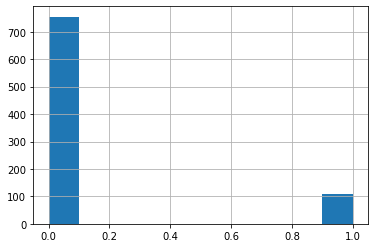

In [155]:
# imbalanced 
df["result"].hist()

0    0.874855
1    0.125145
Name: result, dtype: float64

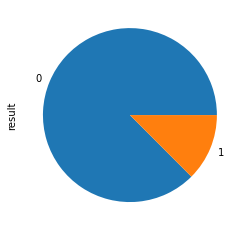

In [156]:
data['result'].value_counts().plot.pie()
data['result'].value_counts(normalize=True) 

In [157]:
df["gender"] = df["gender"].astype("object")
df["country"] = df["country"].astype("object")
df["location"] = df["location"].astype("object");

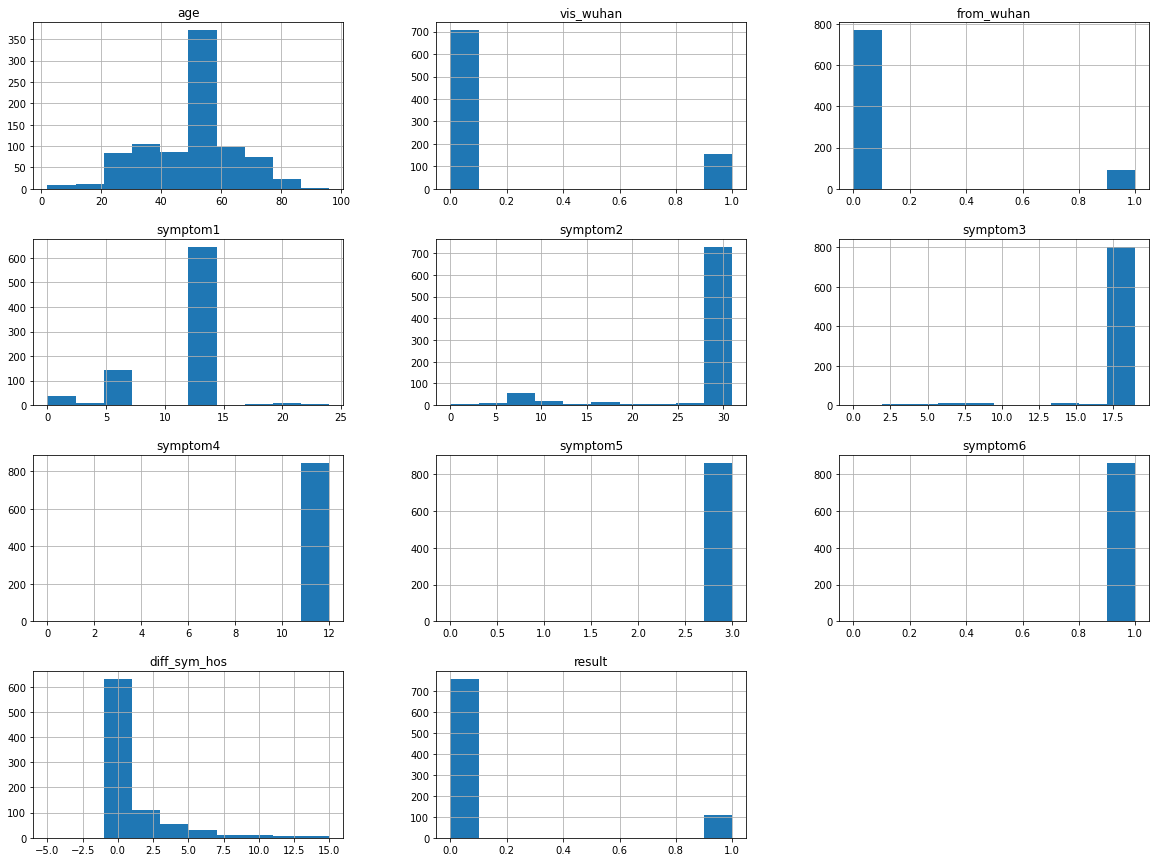

In [158]:
df.iloc[:,2:].hist( figsize=(20, 15));

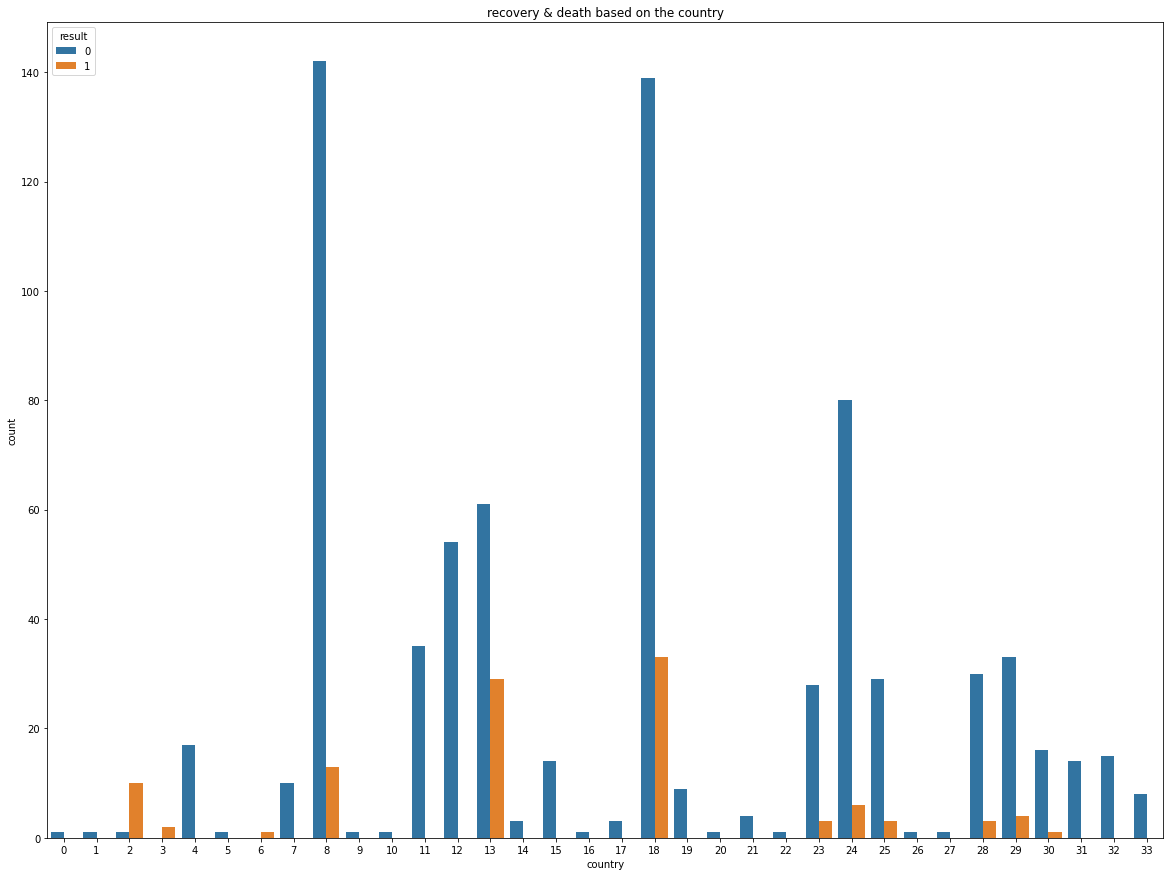

In [159]:
fig = plt.figure(figsize=(20, 15))
ax = sns.countplot(x= "country", hue= "result", data= df);
ax.set_title("recovery & death based on the country");

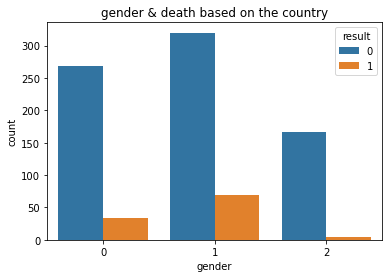

In [160]:
ax = sns.countplot(x= "gender", hue= "result", data= df);
ax.set_title("gender & death based on the country");

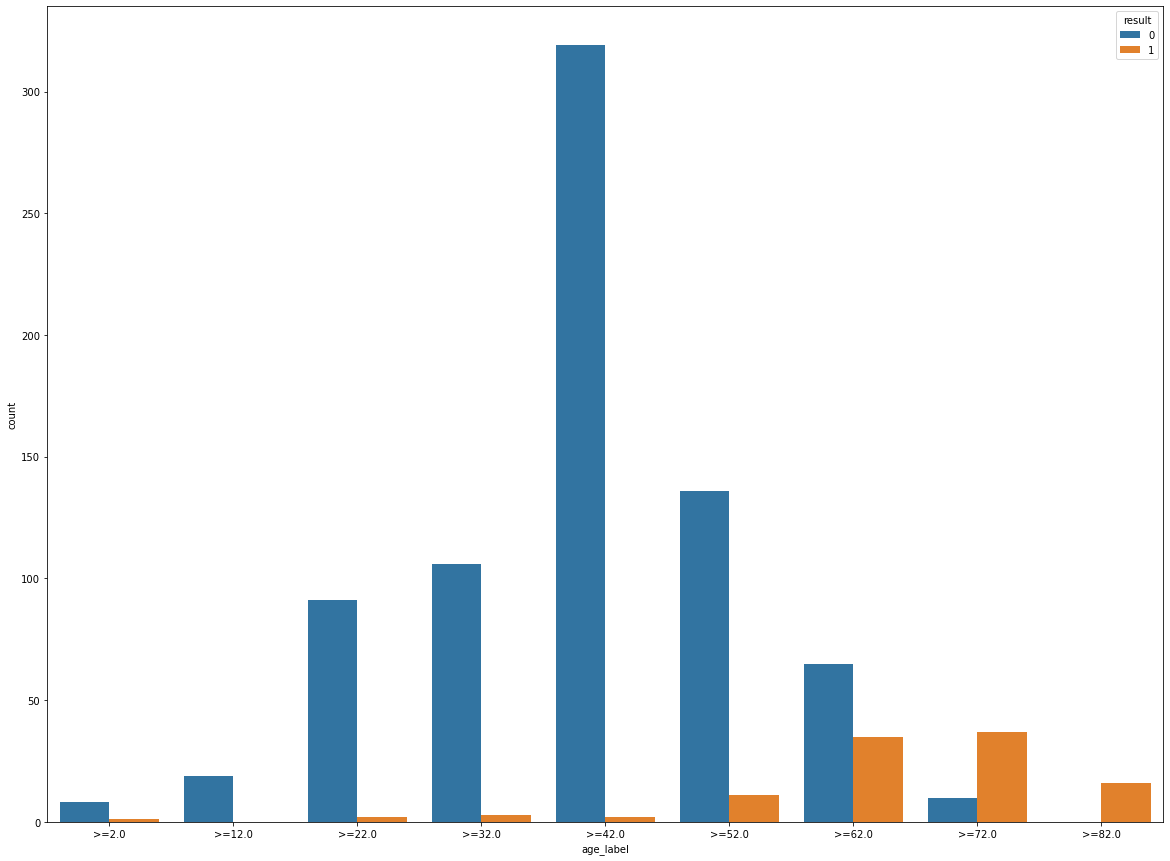

In [161]:
age_ranges = np.arange(data['age'].min(), data["age"].max(), 10)
age_labels =  [f">={age_ranges[i-1]}" for i in range(1,age_ranges.shape[0])]
age_ranges.shape, len(age_labels)
data["age_label"] = pd.cut(data["age"], bins= age_ranges,labels= age_labels)

fig = plt.figure(figsize=(20, 15))
sns.countplot(x="age_label", hue= "result", data= data)
ax.set_title("recovery & death based on the country");

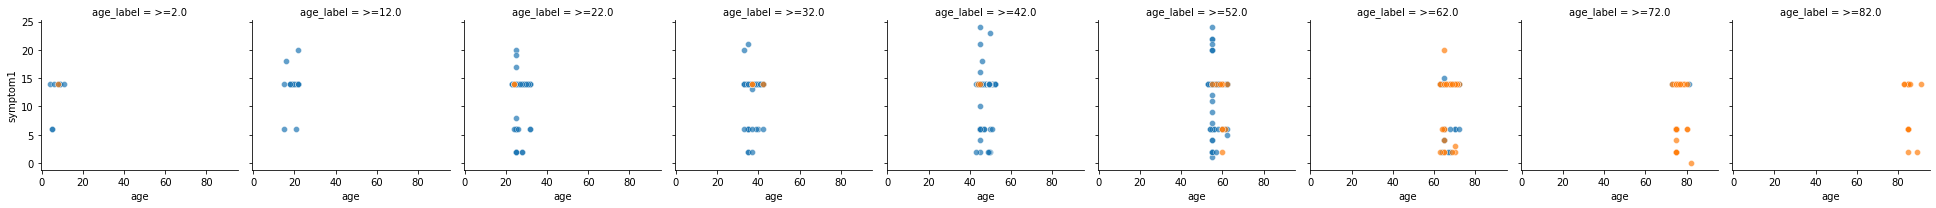

In [162]:
g = sns.FacetGrid(data ,col="age_label", hue="result")
g.map(sns.scatterplot, "age", "symptom1",alpha=.7);

`show the distribution of each numerical value`

<Figure size 432x288 with 0 Axes>

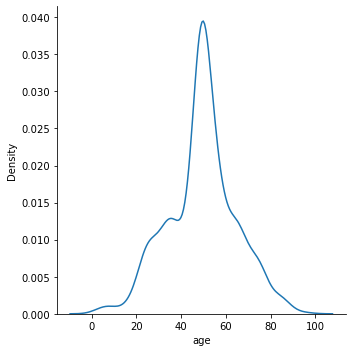

<Figure size 432x288 with 0 Axes>

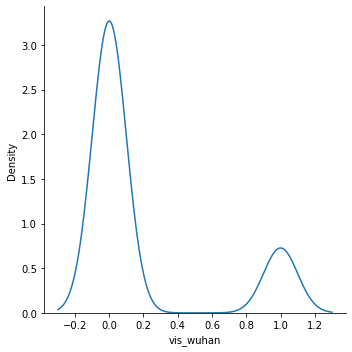

<Figure size 432x288 with 0 Axes>

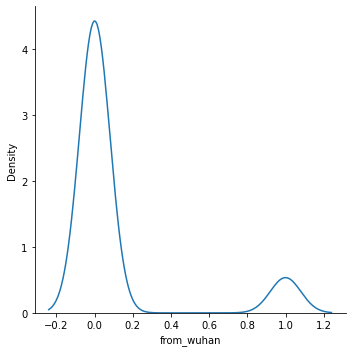

<Figure size 432x288 with 0 Axes>

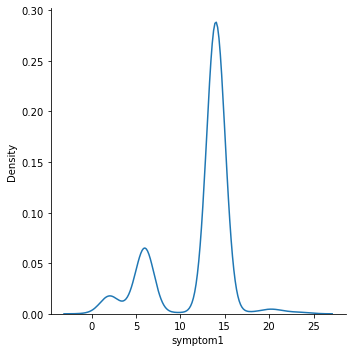

<Figure size 432x288 with 0 Axes>

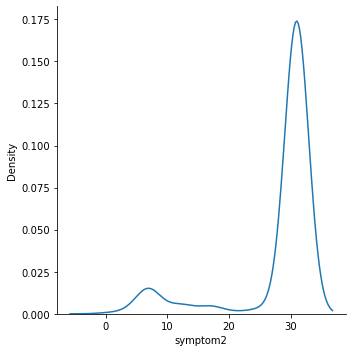

<Figure size 432x288 with 0 Axes>

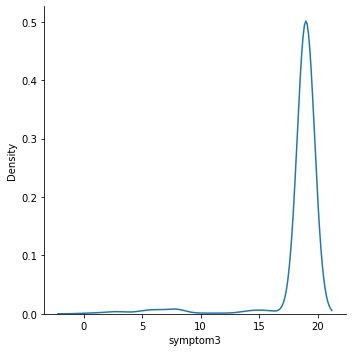

<Figure size 432x288 with 0 Axes>

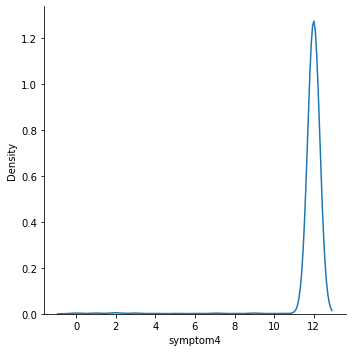

<Figure size 432x288 with 0 Axes>

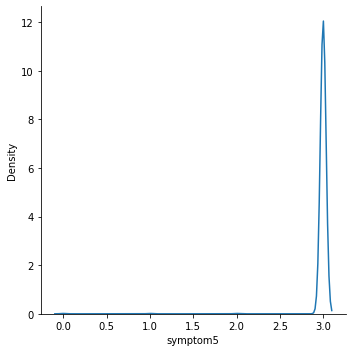

<Figure size 432x288 with 0 Axes>

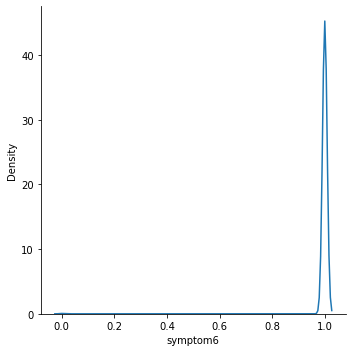

<Figure size 432x288 with 0 Axes>

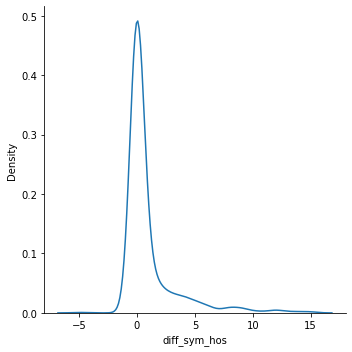

<Figure size 432x288 with 0 Axes>

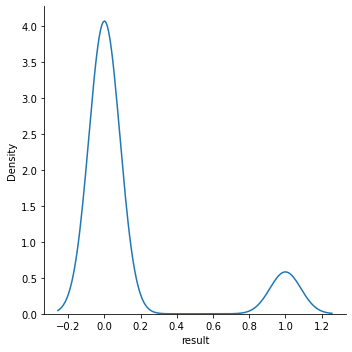

In [163]:
for col in df.select_dtypes(include=['float64','int64']):
    plt.figure()
    sns.displot(df[col],kind='kde',height=5)
    plt.show();

`show the quantitve data description`

In [164]:
for col in df.select_dtypes("object"):
    print(f'{col :-<20} {df[col].unique()}')

location------------ [104 101 137 116 23 105 13 100 135 53 71 67 29 35 102 83 33 42 39 52 41 54
 46 31 103 132 47 99 40 17 88 27 6 4 109 96 25 68 79 76 18 70 16 82 117 1
 80 44 87 75 51 64 37 22 128 86 56 95 97 78 30 59 60 49 77 32 73 106 108
 98 110 114 19 8 74 131 113 38 115 126 127 125 92 107 118 124 90 12 28 9
 120 85 36 93 43 121 45 133 119 58 63 62 138 26 130 81 94 134 69 122 84
 129 57 2 89 65 112 11 72 20 5 123 21 136 55 14 7 91 111 34 50 66 61 10 48
 0 3 24 15]
country------------- [8 11 18 21 23 24 28 29 32 33 2 7 6 12 30 13 17 31 14 22 10 25 26 5 15 16
 20 19 4 3 0 1 9 27]
gender-------------- [1 0 2]


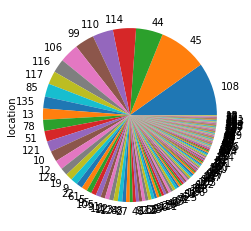

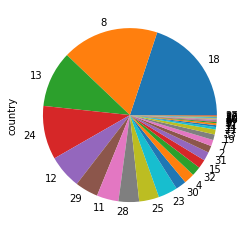

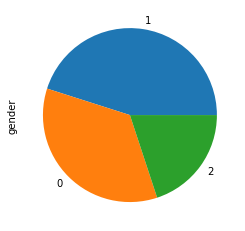

In [165]:
for col in df.select_dtypes("object"):
    plt.figure()
    df[col].value_counts().plot.pie()
    plt.show()

In [166]:
featureList = ['location','country','symptom1','symptom2','symptom3','symptom4','symptom5','symptom6','diff_sym_hos']
for i in featureList:
    print(f"{i} \t {df[i].nunique()}")
    

location 	 139
country 	 34
symptom1 	 25
symptom2 	 32
symptom3 	 20
symptom4 	 13
symptom5 	 4
symptom6 	 2
diff_sym_hos 	 18


`remove the negative values in the data `

In [167]:
df[df.diff_sym_hos < 0]

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
223,56,18,1,35.0,0,0,6,31,19,12,3,1,-1,0
240,128,18,1,65.0,0,0,6,31,19,12,3,1,-5,0


In [168]:
df = df[~df.diff_sym_hos < 0]

In [169]:
df.drop("gender",axis = 1, inplace=True) 

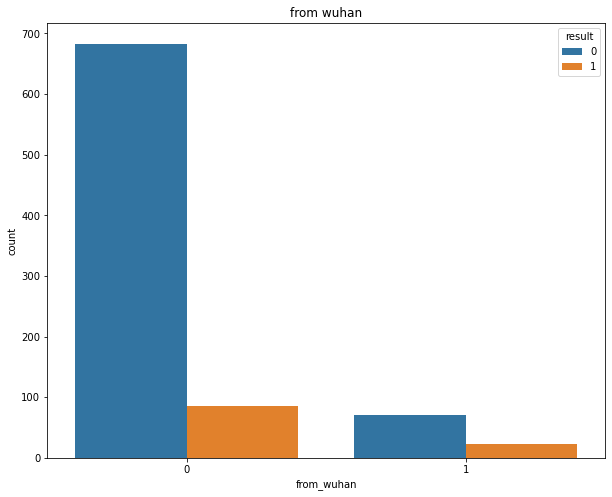

In [170]:
fig = plt.figure(figsize=(10, 8))
ax = sns.countplot(x= "from_wuhan", hue= "result", data= df);
ax.set_title("from wuhan");

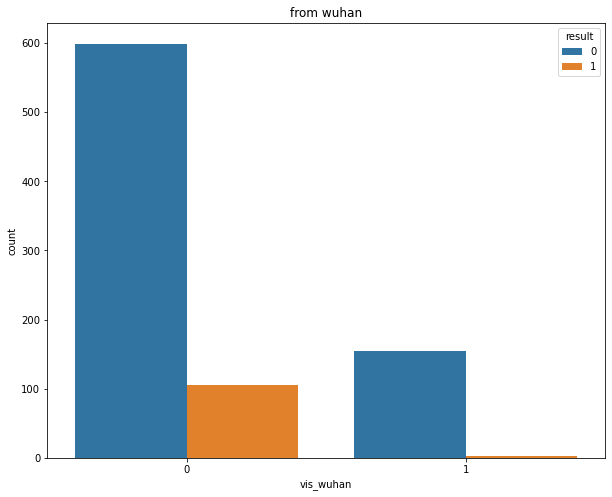

In [171]:
fig = plt.figure(figsize=(10, 8))
ax = sns.countplot(x= "vis_wuhan", hue= "result", data= df);
ax.set_title("from wuhan");

***
### Data Preprocessing

In [172]:
y = df.iloc[:, -1:]
df.drop(columns=["result"], inplace= True)

In [173]:
categorical_columns = ['location','country']
for column in categorical_columns:
    tempdf = pd.get_dummies(df[column], prefix=column)
    df = pd.merge(
        left=df,
        right=tempdf,
        left_index=True,
        right_index=True,
    )
    df = df.drop(columns=column)
X = df.iloc[:,:-1]

In [174]:
d = preprocessing.normalize(X)

names = X.columns.values.tolist()
scaled_df = pd.DataFrame(d, columns = names)
X_new = SelectKBest(chi2, k = "all").fit_transform(scaled_df, y)
X_new.shape

(861, 182)

In [175]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=3)


***
### ML

In [178]:
models_desc = []

In [210]:
def add_model_summary(model_name, model):
    model_desc = {"model": model_name}
    model_desc.update(predict_and_score(model))
    models_desc.append(model_desc)

def get_heighest_coefficiant(w_cof):
    x_w = list(range(w_cof.shape[1]))
    plt.stem(x_w, w_cof[0].flatten(), use_line_collection=True)
    w_flatten = w_cof.flatten()
    w_flatten.sort()
    largest_weight = w_flatten[-4:]
    heighest_weight = []
    for item in largest_weight:
        heighest_weight.append(np.where(w_cof == item)[1][0])
    print(f"height weight feature {[list(df.columns)[index] for index in heighest_weight]}")
    
def evaluate_measure(model, tuning= False): 
    """function used to evaluate the model and print the accuarcy and validation report data"""
    model.fit(X_train, y_train)
    # y_pred = model.predict(X_valid)
    # print(f" confusion_matrix: \n{confusion_matrix(y_valid, y_pred)}")
    # print(f"classification_report: \n{classification_report(y_valid, y_pred)}")
    # print(f"f1_score : \n{f1_score(y_valid, y_pred, average='binary') }")
    # metrics.plot_roc_curve(model, X_valid, y_valid)
    test_model(model)

def test_model(model):
    y_predict = model.predict(X_test)
    # print (f"Mean of correct prediction cases : {np.mean(y_test == y_predict)}")
    print(f" confusion_matrix: \n{confusion_matrix(y_test, y_predict)}")
    print(f"classification_report: \n{classification_report(y_test, y_predict)}")
    print(f"f1_score : \n{f1_score(y_test, y_predict, average='binary') }")
    metrics.plot_roc_curve(model, X_test, y_test)
    
def predict_and_score(clf, as_list= False):
    """
        clf: model 
        X: X_train data 
        y: label data
        return precision, recall, F1, roc_auc
    """
    y_predict = clf.predict(X_test)
    precision= precision_score(y_test, y_predict)
    recall = recall_score(y_test,y_predict)
    roc_auc = roc_auc_score(y_test, y_predict)
    F1 = f1_score(y_test, y_predict)
    accuracy = accuracy_score(y_test, y_predict)
    result = {"accuracy": accuracy, "precision": precision, "recall" : recall, "F1": F1, "roc_auc": roc_auc}
    if as_list: return result.values()
    return result

***
### [KNN](#Knn)

`tunning to find the best k in kkn `

 confusion_matrix: 
[[76  2]
 [ 4  5]]
classification_report: 
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        78
           1       0.71      0.56      0.63         9

    accuracy                           0.93        87
   macro avg       0.83      0.76      0.79        87
weighted avg       0.93      0.93      0.93        87

f1_score : 
0.9271606285464863
 confusion_matrix: 
[[76  2]
 [ 4  5]]
classification_report: 
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        78
           1       0.71      0.56      0.63         9

    accuracy                           0.93        87
   macro avg       0.83      0.76      0.79        87
weighted avg       0.93      0.93      0.93        87

f1_score : 
0.9271606285464863


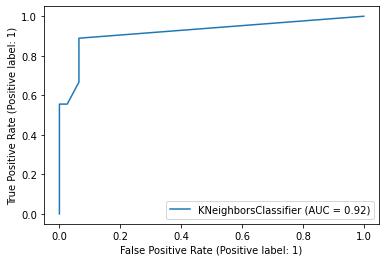

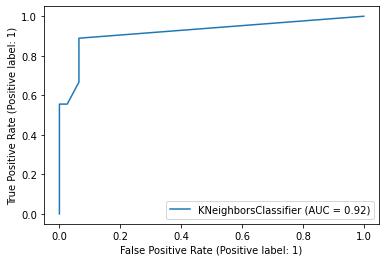

In [182]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
evaluate_measure(knn)

test_model(knn)
add_model_summary("Knn Before Tuning", knn)

In [183]:
dic = {'clf':[], 'recall':[], 'precision':[], 'f1':[], 'roc_auc':[], "accuracy": []}
weights = ['distance', 'uniform']
for k in range(1, int(len(X_train) ** 0.5), 2):
    for weight in weights: 
        knn = KNeighborsClassifier(n_neighbors=k, weights= weight)
        knn.fit(X_train, y_train)
        accuracy, precision, recall, roc_auc, F1 = predict_and_score(knn, as_list= True)
        dic['clf'].append(knn)
        dic['recall'].append(recall)
        dic['precision'].append(precision)
        dic['f1'].append(F1)
        dic['roc_auc'].append(roc_auc)
        dic["accuracy"].append(accuracy)
knn_result = pd.DataFrame(dic)
best_knn_classifier =  knn_result.iloc[knn_result['recall'].idxmax(), 0]
print(best_knn_classifier.n_neighbors)

1


-------------------- Fit and Validate --------------------
 confusion_matrix: 
[[76  2]
 [ 1  8]]
classification_report: 
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        78
           1       0.80      0.89      0.84         9

    accuracy                           0.97        87
   macro avg       0.89      0.93      0.91        87
weighted avg       0.97      0.97      0.97        87

f1_score : 
0.9663134476904162
-------------------- Test --------------------
 confusion_matrix: 
[[76  2]
 [ 1  8]]
classification_report: 
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        78
           1       0.80      0.89      0.84         9

    accuracy                           0.97        87
   macro avg       0.89      0.93      0.91        87
weighted avg       0.97      0.97      0.97        87

f1_score : 
0.9663134476904162


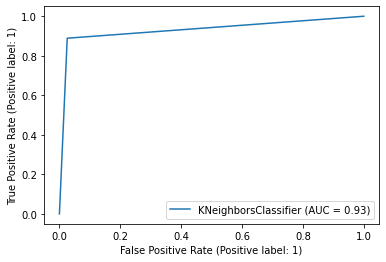

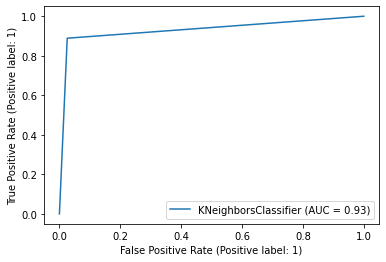

In [184]:
knn = best_knn_classifier# KNeighborsClassifier(n_neighbors=best_knn_classifier.n_neighbors)
knn.fit(X_train, y_train)
print(f"{'-'*20} Fit and Validate {'-'*20}")
evaluate_measure(knn)
print(f"{'-'*20} Test {'-'*20}")
test_model(knn)
add_model_summary("Knn after Tuning", knn)

In [185]:
neighbors = np.arange(1, 10)
y_list = []
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    y_pred = cross_val_score(knn, X_train, y_train, cv=10).mean()
    y_list.append(y_pred)
    if y_pred >= max(y_list):
        max_N = k
    
print(f"The best N is {max_N} with value {max(y_list)}")    

The best N is 1 with value 0.9418414918414918


 confusion_matrix: 
[[76  2]
 [ 1  8]]
classification_report: 
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        78
           1       0.80      0.89      0.84         9

    accuracy                           0.97        87
   macro avg       0.89      0.93      0.91        87
weighted avg       0.97      0.97      0.97        87

f1_score : 
0.9663134476904162
-------------------- Test --------------------
 confusion_matrix: 
[[76  2]
 [ 1  8]]
classification_report: 
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        78
           1       0.80      0.89      0.84         9

    accuracy                           0.97        87
   macro avg       0.89      0.93      0.91        87
weighted avg       0.97      0.97      0.97        87

f1_score : 
0.9663134476904162


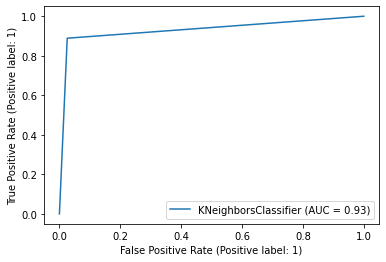

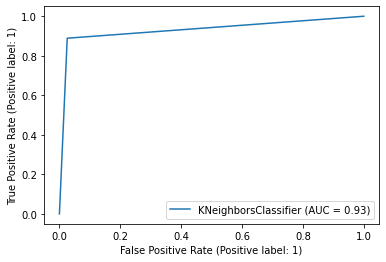

In [186]:
knn = KNeighborsClassifier(n_neighbors=1, algorithm = 'brute')
evaluate_measure(knn)
print(f"{'-'*20} Test {'-'*20}")
test_model(knn)

***
### Logistic Regression

 confusion_matrix: 
[[76  2]
 [ 2  7]]
classification_report: 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        78
           1       0.78      0.78      0.78         9

    accuracy                           0.95        87
   macro avg       0.88      0.88      0.88        87
weighted avg       0.95      0.95      0.95        87

f1_score : 
0.7777777777777778
height weight feature ['location_48', 'from_wuhan', 'location_92', 'country_2']


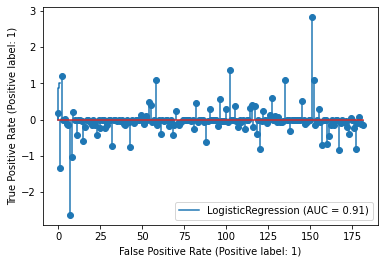

In [213]:
lr = LogisticRegression()
evaluate_measure(lr)
w_cof = lr.coef_
get_heighest_coefficiant(w_cof)
add_model_summary("Logistic Regression Before Tunning", lr)

In [188]:
LR_search.best_params_

{'C': 7, 'dual': False, 'penalty': 'l2', 'solver': 'liblinear'}

Fitting 6 folds for each of 300 candidates, totalling 1800 fits
 confusion_matrix: 
[[77  1]
 [ 1  8]]
classification_report: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        78
           1       0.89      0.89      0.89         9

    accuracy                           0.98        87
   macro avg       0.94      0.94      0.94        87
weighted avg       0.98      0.98      0.98        87

f1_score : 
0.8888888888888888
height weight feature ['location_92', 'country_2', 'location_48', 'location_48']


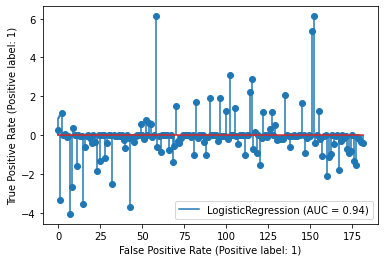

In [212]:
LR = LogisticRegression()
LRparam_grid = {
    'dual': [True, False],
    'C': np.arange(0, 10),
    'penalty': ['none','l1', 'l2'],
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
}
LR_search = GridSearchCV(LR, param_grid = LRparam_grid, refit = True, verbose = 1, cv=6)

# fitting the model for grid search 
LR_search.fit(X_train , y_train)


lr = LogisticRegression(dual= LR_search.best_params_['dual'], C= LR_search.best_params_['C'] , 
                        penalty= LR_search.best_params_['penalty'], solver= LR_search.best_params_['solver'])
evaluate_measure(lr)
get_heighest_coefficiant(lr.coef_)
add_model_summary("Logistic Regression after tuning", lr)

***
### Naive Bayes 

In [190]:
gnb.get_params()

{'priors': None, 'var_smoothing': 0.15199110829529336}

-------------------- Evaluation --------------------
 confusion_matrix: 
[[36 42]
 [ 0  9]]
classification_report: 
              precision    recall  f1-score   support

           0       1.00      0.46      0.63        78
           1       0.18      1.00      0.30         9

    accuracy                           0.52        87
   macro avg       0.59      0.73      0.47        87
weighted avg       0.91      0.52      0.60        87

f1_score : 
0.5972776769509982
-------------------- Test --------------------
 confusion_matrix: 
[[36 42]
 [ 0  9]]
classification_report: 
              precision    recall  f1-score   support

           0       1.00      0.46      0.63        78
           1       0.18      1.00      0.30         9

    accuracy                           0.52        87
   macro avg       0.59      0.73      0.47        87
weighted avg       0.91      0.52      0.60        87

f1_score : 
0.5972776769509982
-------------------- The heighest Weights ----------------

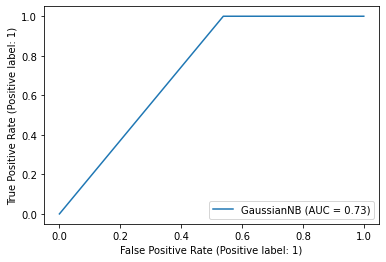

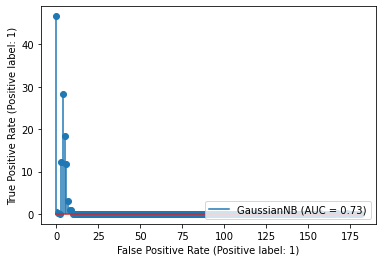

In [208]:
gnb = GaussianNB()
print(f"{'-' * 20} Evaluation {'-'* 20}")
evaluate_measure(gnb)
print(f"{'-' * 20} Test {'-'* 20}")
test_model(gnb)
print(f"{'-'* 20} The heighest Weights {'-'* 20}")
w_cof = gnb.theta_
get_heighest_coefficiant(w_cof)


add_model_summary("GaussianNB", gnb)


In [192]:
np.logspace(0,-9, num=100).min()

1e-09

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
 confusion_matrix: 
[[78  0]
 [ 4  5]]
classification_report: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        78
           1       1.00      0.56      0.71         9

    accuracy                           0.95        87
   macro avg       0.98      0.78      0.84        87
weighted avg       0.96      0.95      0.95        87

f1_score : 
0.9480295566502462


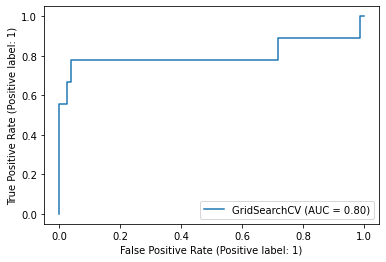

In [193]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
evaluate_measure(nbModel_grid)


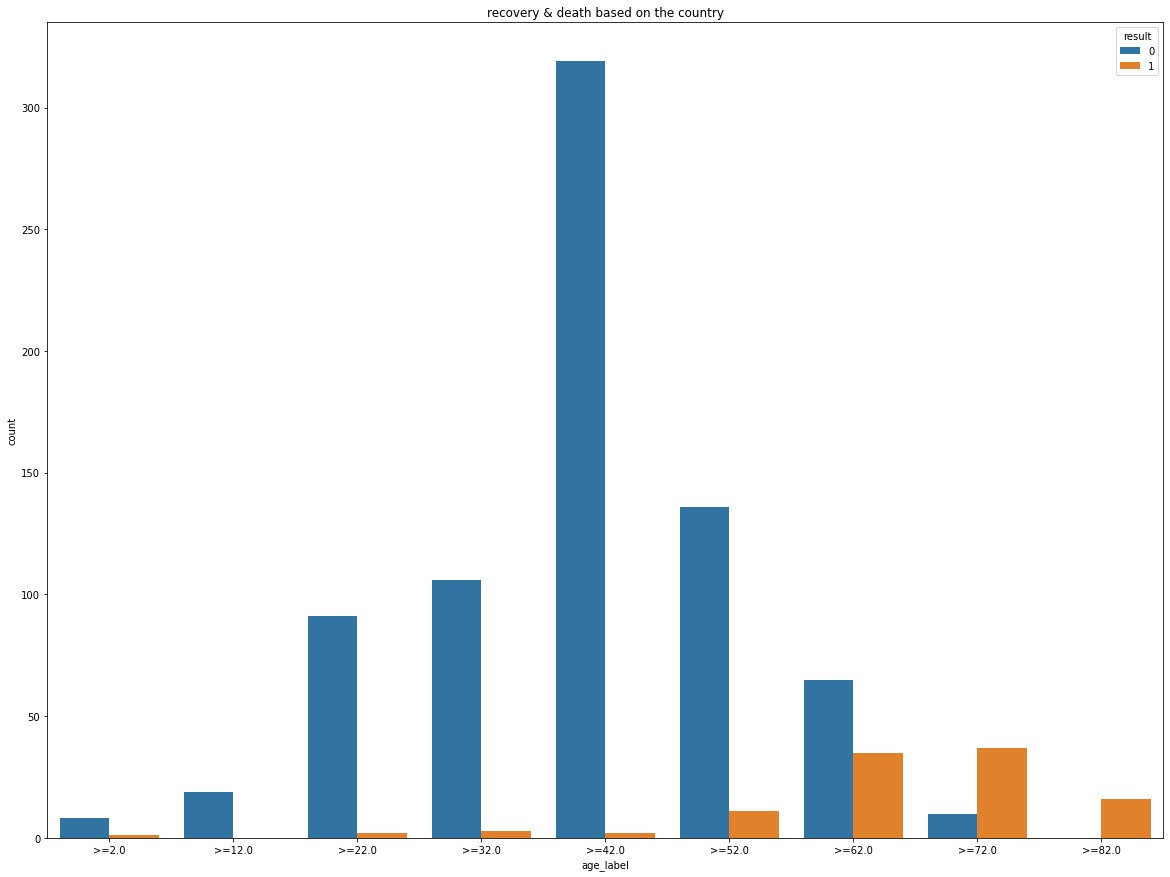

In [194]:
age_ranges = np.arange(df['age'].min(), df["age"].max(), 10)
age_labels =  [f">={age_ranges[i-1]}" for i in range(1,age_ranges.shape[0])]
age_ranges.shape, len(age_labels)
data["age_label"] = pd.cut(data["age"], bins= age_ranges,labels= age_labels)
fig = plt.figure(figsize=(20, 15))
ax = sns.countplot(x= "age_label", hue= "result", data= data);
ax.set_title("recovery & death based on the country");

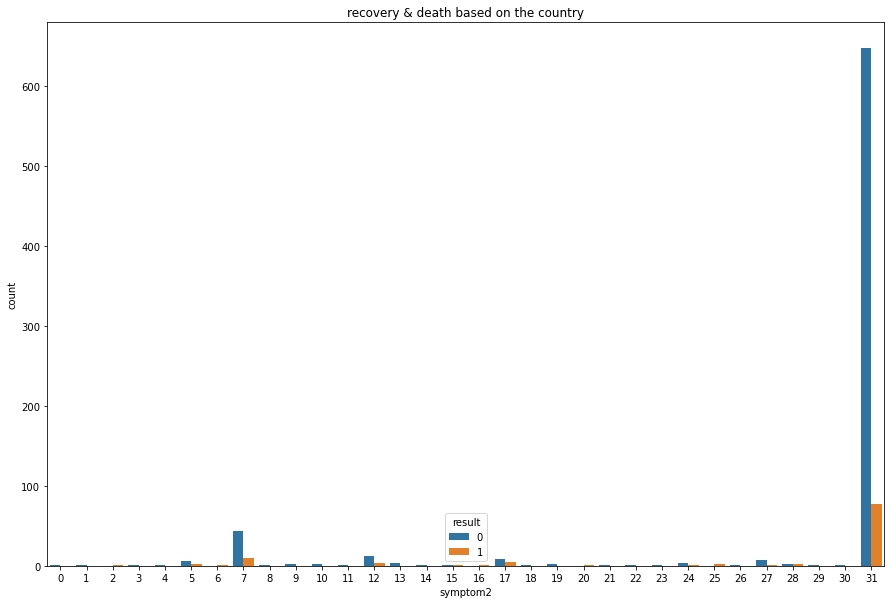

In [195]:
fig = plt.figure(figsize=(15, 10))
ax = sns.countplot(x= "symptom2", hue= "result", data= data);
ax.set_title("recovery & death based on the country");

In [196]:
gs_NB.best_params_

{'var_smoothing': 0.15199110829529336}

In [197]:
gnb.get_params()

{'priors': None, 'var_smoothing': 1e-09}

Fitting 5 folds for each of 100 candidates, totalling 500 fits
-------------------- Evaluation --------------------
 confusion_matrix: 
[[78  0]
 [ 4  5]]
classification_report: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        78
           1       1.00      0.56      0.71         9

    accuracy                           0.95        87
   macro avg       0.98      0.78      0.84        87
weighted avg       0.96      0.95      0.95        87

f1_score : 
0.9480295566502462
-------------------- The heighest Weights --------------------
height weight feature ['symptom2', 'symptom2', 'age', 'age']


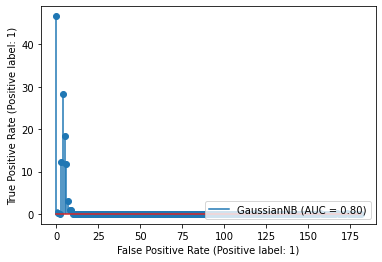

In [206]:
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, param_grid = params_NB, verbose=1, scoring='accuracy') 
gs_NB.fit(X_train, y_train)

var_value = gs_NB.best_params_.get('var_smoothing')
gnb = GaussianNB(var_smoothing = var_value)

print(f"{'-' * 20} Evaluation {'-'* 20}")
evaluate_measure(gnb)
print(f"{'-'* 20} The heighest Weights {'-'* 20}")
w_cof = gnb.theta_
get_heighest_coefficiant(w_cof)
add_model_summary("GaussianNB after Tunning", gnb)

### End of Naive bayes 

***
### Decission tree

In [199]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import pydotplus

-------------------- Evaluation --------------------
 confusion_matrix: 
[[75  3]
 [ 1  8]]
classification_report: 
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        78
           1       0.73      0.89      0.80         9

    accuracy                           0.95        87
   macro avg       0.86      0.93      0.89        87
weighted avg       0.96      0.95      0.96        87

f1_score : 
0.9560232870577698
-------------------- Test --------------------
 confusion_matrix: 
[[75  3]
 [ 1  8]]
classification_report: 
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        78
           1       0.73      0.89      0.80         9

    accuracy                           0.95        87
   macro avg       0.86      0.93      0.89        87
weighted avg       0.96      0.95      0.96        87

f1_score : 
0.9560232870577698


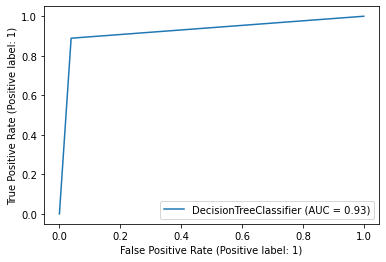

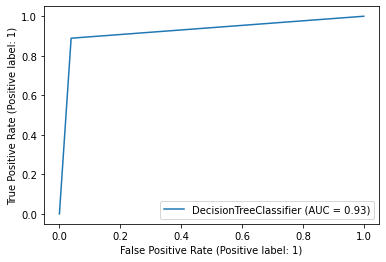

In [200]:
dtree = DecisionTreeClassifier(random_state=3)
print(f"{'-' * 20} Evaluation {'-'* 20}")
evaluate_measure(dtree)
print(f"{'-' * 20} Test {'-'* 20}")
test_model(dtree) 

add_model_summary("decision tree Before Tunning", dtree)

Fitting 7 folds for each of 392 candidates, totalling 2744 fits
 confusion_matrix: 
[[76  2]
 [ 1  8]]
classification_report: 
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        78
           1       0.80      0.89      0.84         9

    accuracy                           0.97        87
   macro avg       0.89      0.93      0.91        87
weighted avg       0.97      0.97      0.97        87

f1_score : 
0.9663134476904162
 confusion_matrix: 
[[76  2]
 [ 1  8]]
classification_report: 
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        78
           1       0.80      0.89      0.84         9

    accuracy                           0.97        87
   macro avg       0.89      0.93      0.91        87
weighted avg       0.97      0.97      0.97        87

f1_score : 
0.9663134476904162


({'ccp_alpha': 0.0,
  'class_weight': None,
  'criterion': 'gini',
  'max_depth': 13,
  'max_features': 10,
  'max_leaf_nodes': None,
  'min_impurity_decrease': 0.0,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'min_weight_fraction_leaf': 0.0,
  'random_state': 3,
  'splitter': 'best'},
 13)

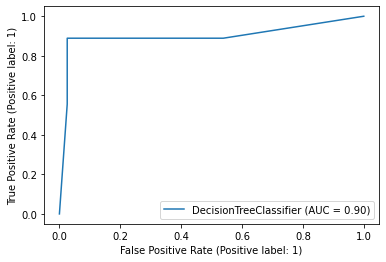

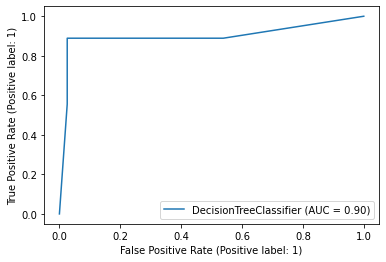

In [201]:
dtreeparam_grid = {
    'max_depth': np.arange(1,15),
    'max_features': np.arange(1,15),
    'random_state': [3],
    'criterion': ['gini', 'entropy']
}
dtree_search = GridSearchCV(dtree, param_grid = dtreeparam_grid, refit = True, verbose = 1, cv=7)
dtree_search.fit(X_train , y_train)

dtree = DecisionTreeClassifier(criterion= dtree_search.best_params_['criterion'] , max_depth= dtree_search.best_params_['max_depth'], 
                               max_features = dtree_search.best_params_['max_features'], random_state=3)
evaluate_measure(dtree)

test_model(dtree)
add_model_summary("DT after Tunning", dtree)
dtree.get_params(), dtree.get_depth()

***
# Support Vector Machine

 confusion_matrix: 
[[78  0]
 [ 3  6]]
classification_report: 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        78
           1       1.00      0.67      0.80         9

    accuracy                           0.97        87
   macro avg       0.98      0.83      0.89        87
weighted avg       0.97      0.97      0.96        87

f1_score : 
0.9623942745608328
 confusion_matrix: 
[[78  0]
 [ 3  6]]
classification_report: 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        78
           1       1.00      0.67      0.80         9

    accuracy                           0.97        87
   macro avg       0.98      0.83      0.89        87
weighted avg       0.97      0.97      0.96        87

f1_score : 
0.9623942745608328


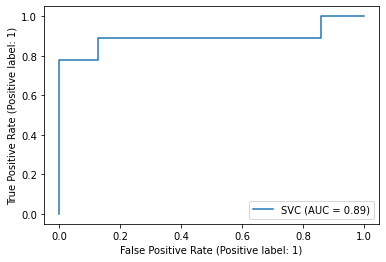

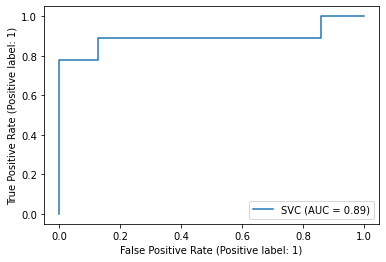

In [202]:
from sklearn.svm import SVC
svc = SVC()
evaluate_measure(svc)
# add_model_summary("SVC Before Tunning", SVC)

Fitting 4 folds for each of 48 candidates, totalling 192 fits
 confusion_matrix: 
[[74  4]
 [ 0  9]]
classification_report: 
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        78
           1       0.69      1.00      0.82         9

    accuracy                           0.95        87
   macro avg       0.85      0.97      0.90        87
weighted avg       0.97      0.95      0.96        87

f1_score : 
0.9575977561458504


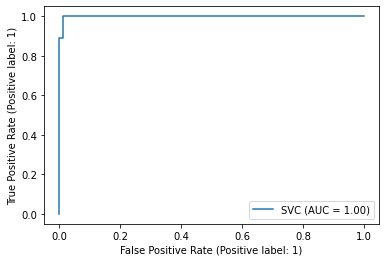

In [209]:
svcparam_grid = {
    'kernel': ['poly','rbf','sigmoid'],
    'degree': np.arange(1,5),
    'random_state':[3],
    'C': np.arange(0,2),
    'gamma':['scale', 'auto']
}
svc_search = GridSearchCV(svc, param_grid = svcparam_grid, refit = True, verbose = 1, cv=4)
svc_search.fit(X_train , y_train)

svc = SVC(C= svc_search.best_params_['C'], degree= svc_search.best_params_['degree'], gamma= svc_search.best_params_['gamma'], 
              kernel = svc_search.best_params_['kernel'], random_state=3)

evaluate_measure(svc)

In [204]:
pd.DataFrame(models_desc)

,model,accuracy,precision,recall,F1,roc_auc
0,Knn Before Tuning,0.931034,0.714286,0.555556,0.625000,0.764957
1,Knn after Tuning,0.965517,0.800000,0.888889,0.842105,0.931624
2,Logistic Regression Before Tunning,0.954023,0.777778,0.777778,0.777778,0.876068
3,Logistic Regression after tuning,0.977011,0.888889,0.888889,0.888889,0.938034
4,GaussianNB,0.517241,0.176471,1.000000,0.300000,0.730769
5,GaussianNB after Tunning,0.954023,1.000000,0.555556,0.714286,0.777778
6,decision tree Before Tunning,0.954023,0.727273,0.888889,0.800000,0.925214
7,DT after Tunning,0.965517,0.800000,0.888889,0.842105,0.931624
